# POS Data Analysis - Rodrigo Morales Ramírez

In [1]:
#pip install mlxtend

In [2]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('optional-POS-data.csv')
df

,Date,Time,Transaction,Item
0,10/30/2016,9:58:11,1,Bread
1,10/30/2016,10:05:34,2,Scandinavian
2,10/30/2016,10:05:34,2,Scandinavian
3,10/30/2016,10:07:57,3,Hot chocolate
4,10/30/2016,10:07:57,3,Jam
...,...,...,...,...
21288,4/9/2017,14:32:58,9682,Coffee
21289,4/9/2017,14:32:58,9682,Tea
21290,4/9/2017,14:57:06,9683,Coffee
21291,4/9/2017,14:57:06,9683,Pastry


# Exploratory Data Analysis (EDA)

## Top 5 items sold

In [4]:
df1 = df.groupby(['Item']).count().reset_index().drop(columns=['Date', 'Time']).rename(columns={'Transaction': 'Count'})
df5 = df1.sort_values(by=['Count'], ascending=False).head().reset_index().drop(columns=['index'])
df5

,Item,Count
0,Coffee,5471
1,Bread,3325
2,Tea,1435
3,Cake,1025
4,Pastry,856


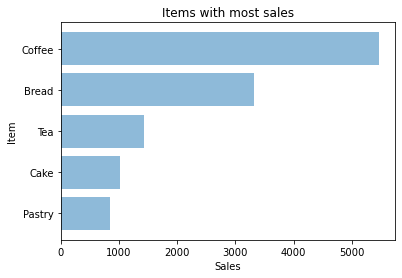

In [5]:
plt.barh(df5["Item"], df5["Count"],  align='center', alpha=0.5)
plt.ylabel('Item')
plt.xlabel('Sales')
plt.title('Items with most sales')
plt.gca().invert_yaxis()
plt.show()

## Number of unique transactions

In [6]:
len(df['Transaction'].unique().tolist())

9531

## Number of items per transaction

In [7]:
len(df)/len(df['Transaction'].unique().tolist())

2.2340782709054663

## Timerange

In [8]:
df["Timestamp"] = df["Date"] + " " + df["Time"]
df["Timestamp"] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M:%S')
df["Time"] = pd.to_datetime(df['Time'],format= '%H:%M:%S' ).dt.time
df.head()

,Date,Time,Transaction,Item,Timestamp
0,10/30/2016,09:58:11,1,Bread,2016-10-30 09:58:11
1,10/30/2016,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,10/30/2016,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,10/30/2016,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,10/30/2016,10:07:57,3,Jam,2016-10-30 10:07:57


### First date

In [9]:
min(df['Timestamp'])

Timestamp('2016-10-30 09:58:11')

### Final date

In [10]:
max(df['Timestamp'])

Timestamp('2017-04-09 15:04:24')

## Products sold per time ranges

In [11]:
df['Hour'] = pd.to_datetime(df['Time'],format= '%H:%M:%S' ).dt.hour

In [12]:
df1 = df.groupby(['Hour']).count().reset_index()
df1 = df1.drop(['Date', 'Time', 'Transaction', 'Item'], axis=1)
df1 = df1.rename(columns={"Timestamp": "Count"})
df1

,Hour,Count
0,1,1
1,7,25
2,8,669
3,9,2045
4,10,2763
5,11,3216
6,12,3021
7,13,2776
8,14,2736
9,15,2147


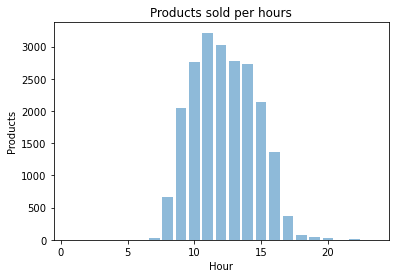

In [13]:
plt.bar(df1["Hour"], df1["Count"], align='center', alpha=0.5)
plt.ylabel('Products')
plt.xlabel('Hour')
plt.title('Products sold per hours')

plt.show()

In [14]:
df2 = df.groupby(['Date']).count().reset_index()
df2 = df2.drop(['Hour', 'Time', 'Transaction', 'Item'], axis=1)
df2 = df2.rename(columns={"Timestamp": "Count"})
df2

,Date,Count
0,1/1/2017,1
1,1/10/2017,85
2,1/11/2017,109
3,1/12/2017,76
4,1/13/2017,119
...,...,...
154,4/5/2017,145
155,4/6/2017,119
156,4/7/2017,103
157,4/8/2017,209


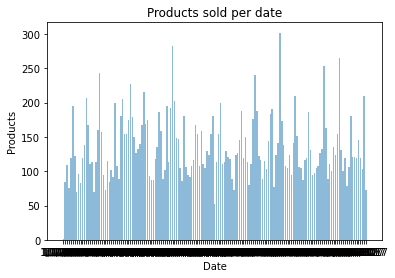

In [15]:
plt.bar(df2["Date"], df2["Count"], align='center', alpha=0.5)
plt.ylabel('Products')
plt.xlabel('Date')
plt.title('Products sold per date')
plt.show()

In [16]:
df['Month'] = pd.to_datetime(df['Date'],format= '%m/%d/%Y' ).dt.month
df3 = df.groupby(['Month']).count().reset_index()
df3 = df3.drop(['Date', 'Time', 'Transaction', 'Item', 'Hour'], axis=1)
df3 = df3.rename(columns={"Timestamp": "Count"})
df3

,Month,Count
0,1,3509
1,2,3991
2,3,4041
3,4,1191
4,10,385
5,11,4607
6,12,3569


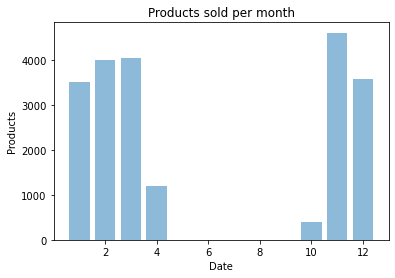

In [17]:
plt.bar(df3["Month"], df3["Count"], align='center', alpha=0.5)
plt.ylabel('Products')
plt.xlabel('Date')
plt.title('Products sold per month')
plt.show()

## Days with more items sold

In [18]:
df4 = df2.sort_values(by=['Count'], ascending=False).head().reset_index().drop(columns=['index'])
df4

,Date,Count
0,2/4/2017,302
1,11/5/2016,283
2,3/4/2017,265
3,3/25/2017,254
4,1/28/2017,243


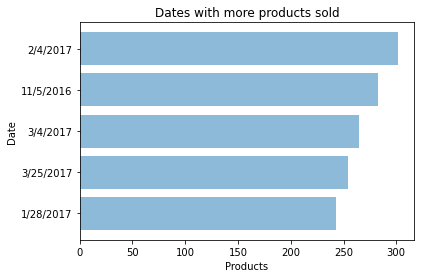

In [19]:
plt.barh(df4["Date"], df4["Count"],  align='center', alpha=0.5)
plt.ylabel('Date')
plt.xlabel('Products')
plt.title('Dates with more products sold')
plt.gca().invert_yaxis()
plt.show()

# Apriori algorithm

In [20]:
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1

In [21]:
basket_df = df.drop(columns=['Date', 'Time', 'Timestamp', 'Hour', 'Month'])
basket_df

,Transaction,Item
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam
...,...,...
21288,9682,Coffee
21289,9682,Tea
21290,9683,Coffee
21291,9683,Pastry


In [22]:
one_hot = pd.get_dummies(basket_df['Item'])
basket_df_one_hot = pd.concat([basket_df, one_hot], axis=1).drop(columns=['Item'])
basket_df_one_hot = basket_df_one_hot.groupby(['Transaction']).max()
basket_df_one_hot

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Building the model
frq_items = apriori(basket_df_one_hot, min_support = 0.05, use_colnames = True)
 
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.00535,1.109667
1,(Coffee),(Cake),0.475081,0.103137,0.054349,0.114399,1.109196,0.00535,1.012717
